   
   # Stock Data Prediction
   #### by- Garvit Kr. Arya

#####  -> Importing essential basic libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For showing graph within (inline) the notebook
%matplotlib inline  

######  -> Importing Data

In [10]:
dataset = pd.read_csv('D:\ML and DA\TINO IQ\stock_historical_data.csv')
dataset.head()

,symbol,date_txn,open,low,high,close_price,volume,lead_1,lead_5,lead_10,name,class_type_of
0,SPY,11-10-2015,207.51,207.19,208.60,208.55,71844000,207.67,205.47,209.35,SPDR S&P500,S_P_500
1,SPY,11-11-2015,208.88,207.66,208.94,207.67,67251000,204.84,208.73,209.32,SPDR S&P500,S_P_500
2,SPY,11-12-2015,206.50,204.82,207.06,204.84,118209400,202.54,208.55,209.56,SPDR S&P500,S_P_500
3,SPY,11/13/2015,204.35,202.44,204.67,202.54,145494400,205.62,209.31,208.69,SPDR S&P500,S_P_500
4,SPY,11/16/2015,202.32,202.18,205.69,205.62,112996000,205.47,209.07,210.68,SPDR S&P500,S_P_500


######  -> Seperating useful attributes

In [11]:
dataset = dataset[['date_txn','open','high','low','close_price','volume']]

dataset = dataset.rename(columns = {'date_txn':'date','close_price':'close'})

dataset['date'] = pd.to_datetime(dataset['date'])

dataset = dataset[['open','high','low','volume','close']]

dataset.head()

,open,high,low,volume,close
0,207.51,208.60,207.19,71844000,208.55
1,208.88,208.94,207.66,67251000,207.67
2,206.50,207.06,204.82,118209400,204.84
3,204.35,204.67,202.44,145494400,202.54
4,202.32,205.69,202.18,112996000,205.62


###### -> Normalizing Dataset ( performing feature scaling)

In [14]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

dataset = ms.fit_transform(dataset)

dataset = pd.DataFrame(dataset)

dataset = dataset.rename(columns = {0:'open', 1:'high', 2:'low', 3:'volume', 4:'close'})

dataset.head()

,open,high,low,volume,close
0,0.725391,0.727425,0.727916,0.197048,0.247686
1,0.730189,0.728613,0.729570,0.183909,0.239202
2,0.721855,0.722046,0.719575,0.329687,0.211917
3,0.714326,0.713697,0.711199,0.407741,0.189742
4,0.707217,0.717260,0.710284,0.314773,0.219437


##### -> Seperating "Independent" & "Dependent" variables

In [15]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4:5].values

##### -> Dividing Dataset into "Train-Test set"

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

##### -> Fitting "Multiple Linear Regression" on Dataset

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### -> Predicting model with test set

In [22]:
y_pred = regressor.predict(x_test)


#### -> Accuracy

In [33]:
accuracy = regressor.score(x_test,y_test)
accuracy = (accuracy*100)
print(accuracy,'%')

97.7686465673 %


##### Visualizing "Actual" and "Predicted"  values

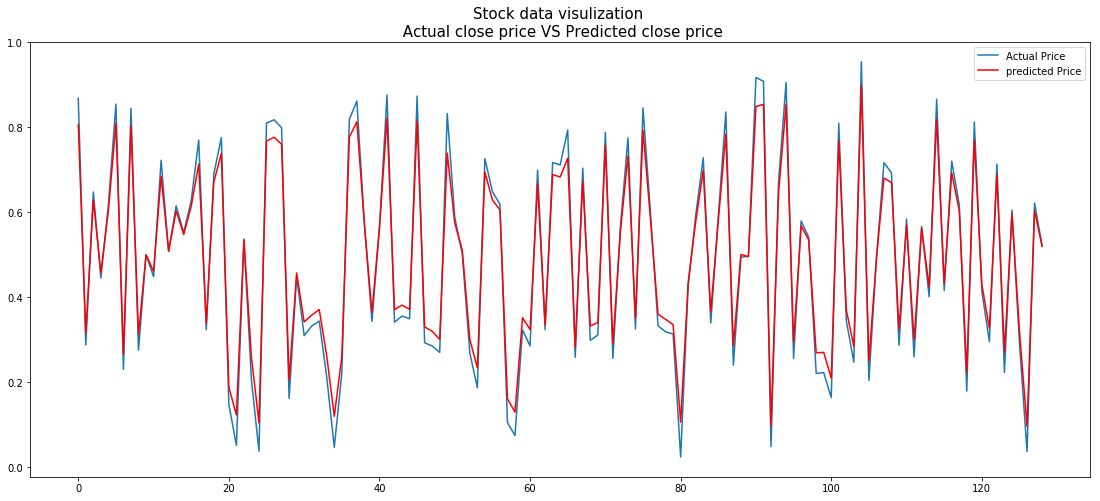

In [57]:
plt.plot(y_test,label = 'Actual Price')
plt.plot(y_pred,label = 'predicted Price',color='red')
plt.title('Stock data visulization \n Actual close price VS Predicted close price',fontsize=15)
plt.legend()
plt.rcParams['figure.figsize'] = [19,8]

### CONCLUSION

The above model gives the "Accuracy" of "97.7%" which shows that the prediction is very close to the actual value and the visualization in which we plot the graph between "Actual" & "Predicted" values also shows the same accuracy.